(1160, 820)


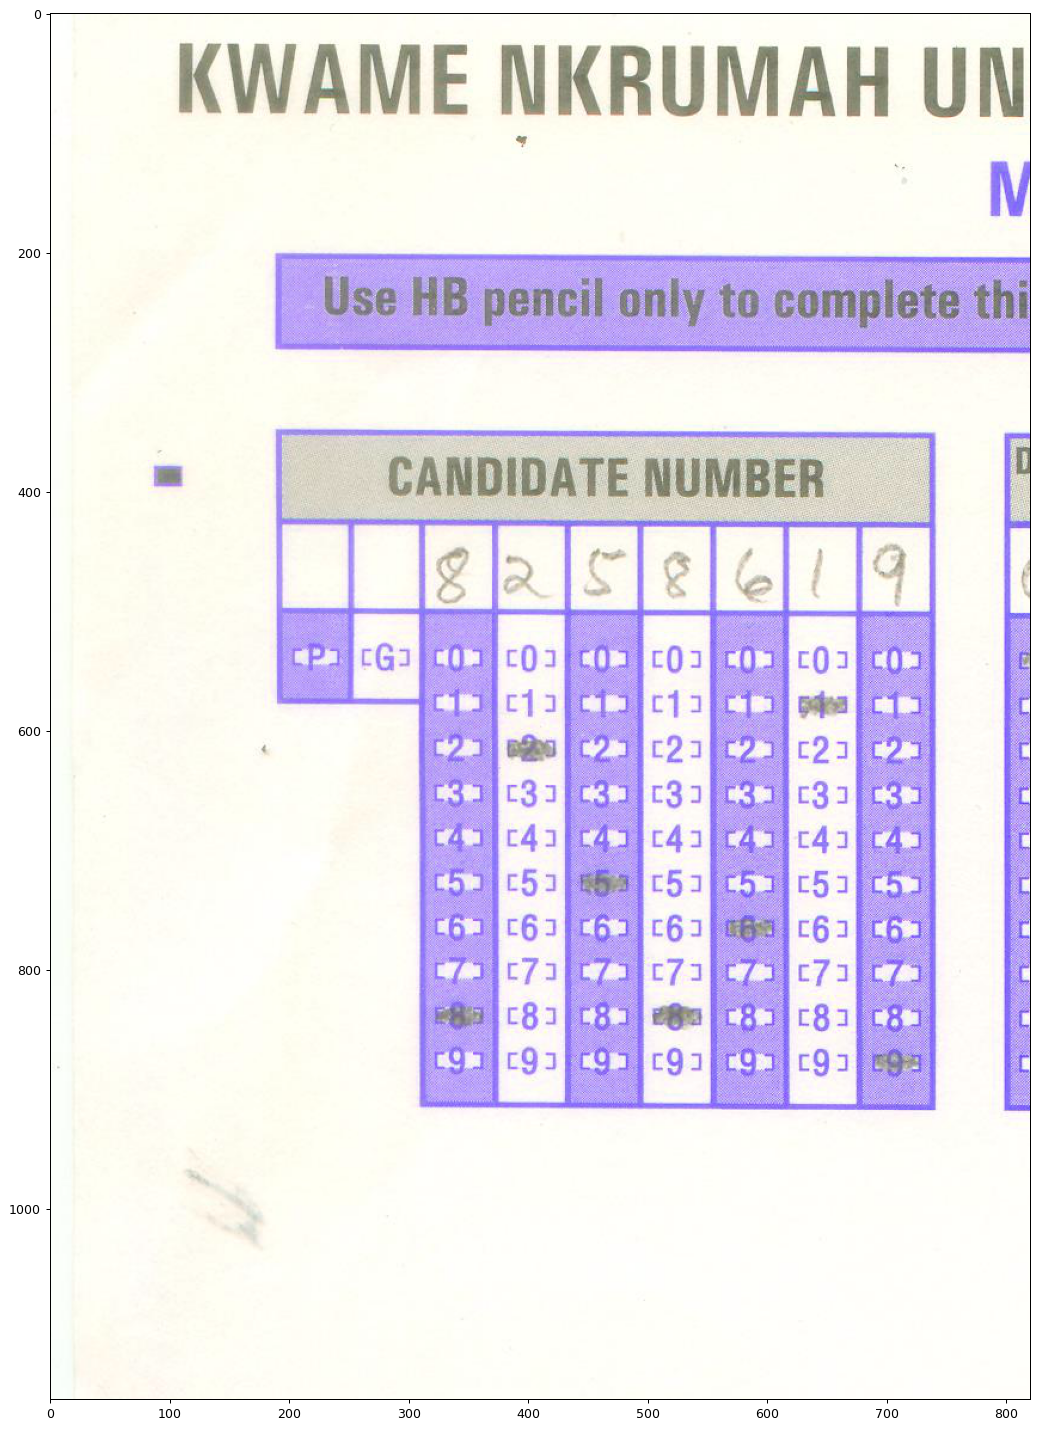

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

width= 2550
height = 3510


img = cv2.imread("../test/001.jpg")
img = cv2.resize(img, (width, height))
resized_img = img[10:img.shape[0]//3, 30:img.shape[1]//3]
imgGray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY) # CONVERT IMAGE TO GRAY SCALE
print(imgGray.shape)
imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADD GAUSSIAN BLUR
imgCanny = cv2.Canny(imgBlur,10,70) # APPLY CANNY 

figure(figsize=(20, 20), dpi=90)
plt.imshow(resized_img)




272230.0


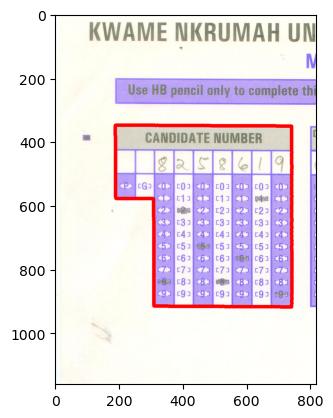

In [78]:
contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# FIND ALL CONTOURS

guided_image = resized_img.copy()

biggestCnt = None
for cnt in range(0, len(contours)):
    if cv2.contourArea(contours[cnt]) > 20000:
        print(cv2.contourArea(contours[cnt]))
        biggestCnt = cnt
        cv2.drawContours(guided_image, contours, cnt, (255, 0, 0), 10)

cnt = contours[biggestCnt]
# cv2.drawContours(resized_img, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS
# figure(figsize=(20, 20), dpi=90)
plt.imshow(guided_image)
# print(cnt.shape)


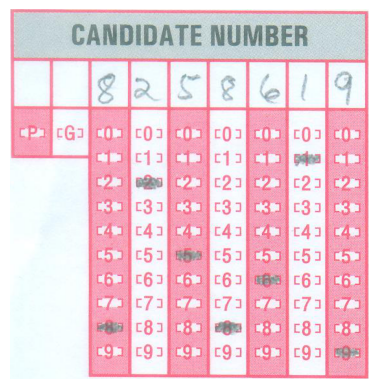

In [73]:
# Find the bounding rectangle of the contour
x, y, w, h = cv2.boundingRect(cnt)

# Crop the image based on the contour
idxno_image = resized_img[y:y+h, x:x+w]

# Display the cropped image
plt.imshow(cv2.cvtColor(idxno_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



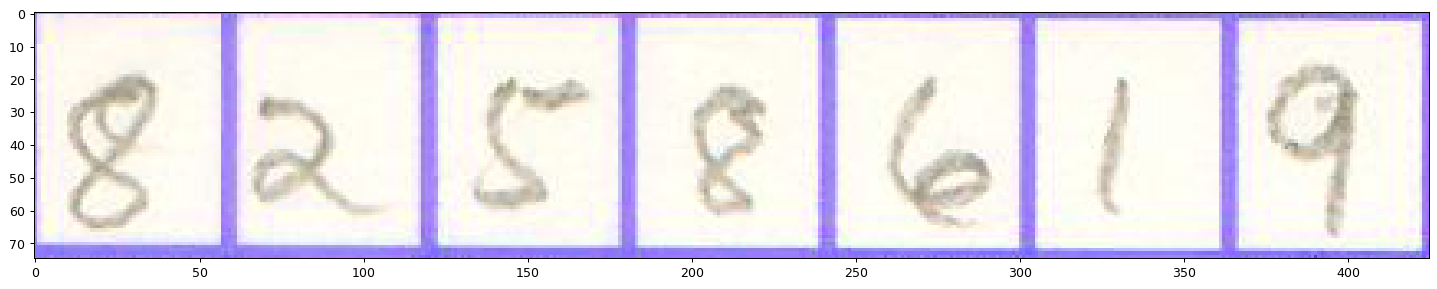

In [74]:


# REMOVE [n] PIXELS FORM EACH SIDE
resized_image = idxno_image[80:155, 125:idxno_image.shape[1] - 4]
# imgWarpColored = cv2.resize(imgWarpColored,(width,height))

figure(figsize=(20, 20), dpi=90)
plt.imshow(resized_image)




In [75]:
resized_image.shape

(75, 425, 3)

In [76]:
# Crop out to get all individual columns

firstCol = resized_image[3:resized_image.shape[0]-3, 3:55]
secondCol = resized_image[3:resized_image.shape[0]-3, 63:115]
thirdCol = resized_image[3:resized_image.shape[0]-3, 125:180]
fourthCol = resized_image[3:resized_image.shape[0]-3, 185:240]
fifthCol = resized_image[3:resized_image.shape[0]-3, 248:300]
sixthCol = resized_image[3:resized_image.shape[0]-3, 310:360]
seventhCol = resized_image[3:resized_image.shape[0]-3, 370:-5]

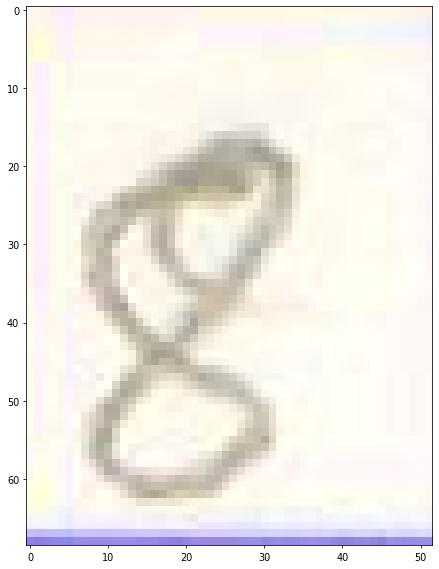

In [77]:

figure(figsize=(10, 10), dpi=70)
plt.imshow(firstCol, cmap='gray')

# figure(figsize=(10, 10), dpi=70)
# plt.imshow(secondCol, cmap='gray')

# figure(figsize=(10, 10), dpi=70)
# plt.imshow(thirdCol, cmap='gray')

# figure(figsize=(10, 10), dpi=70)
# plt.imshow(fourthCol, cmap='gray')

# figure(figsize=(10, 10), dpi=70)
# plt.imshow(fifthCol, cmap='gray')

# figure(figsize=(10, 10), dpi=70)
# plt.imshow(sixthCol, cmap='gray')

# figure(figsize=(10, 10), dpi=70)
# plt.imshow(seventhCol, cmap='gray')